In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

##### Data

In [2]:
df = pd.read_csv('files/CleanedData.csv')

In [3]:
df.head(1)

,title,rating,image,price,touch,quick_charge,gpu,processor_brand,ram,hd,...,width,os,core,clock_speed,storage,expandable,camera,secondary_camera,video,network
0,"POCO M6 5G (Galactic Black, 128 GB) (4 GB RAM)",4.2,https://rukminim2.flixcart.com/image/416/416/x...,12999,Yes,yes,yes,Mediatek,4.0,Yes,...,720.0,a13,Octa,2.2,128.0,1000.0,50.0,5.0,FHD,5G


In [4]:
df.shape

(550, 36)

In [5]:
df.duplicated().sum()

0

In [6]:
df.isnull().sum()

title                 0
rating                0
image                 0
price                 0
touch                 2
quick_charge          0
gpu                   0
processor_brand     124
ram                  26
hd                  237
battery              10
battery_type        234
warranty_time       274
java                478
brand                 0
headset               0
charger               0
warranty              0
cable                 0
pro                   0
model                 0
color1                0
color2              160
sim                   0
display               1
height                3
width                 3
os                    0
core                154
clock_speed          73
storage               4
expandable          274
camera               38
secondary_camera    193
video               288
network               6
dtype: int64

In [7]:
df.dtypes

title                object
rating              float64
image                object
price                 int64
touch                object
quick_charge         object
gpu                  object
processor_brand      object
ram                 float64
hd                   object
battery             float64
battery_type         object
warranty_time       float64
java                 object
brand                object
headset                bool
charger                bool
warranty               bool
cable                  bool
pro                    bool
model                object
color1               object
color2               object
sim                  object
display             float64
height              float64
width               float64
os                   object
core                 object
clock_speed         float64
storage             float64
expandable          float64
camera              float64
secondary_camera    float64
video                object
network             

In [8]:
def bars(x,r = 0):
    fig, ax = plt.subplots(nrows=1,ncols=3,figsize=(18,4))

    sns.barplot(data=df,x=x,y="price",estimator="median",ax=ax[0])
    ax[0].set_xticklabels(ax[0].get_xticklabels(),rotation=r)

    sns.barplot(data=df,x=x,y="price",estimator="max",ax=ax[1])
    ax[1].set_xticklabels(ax[1].get_xticklabels(),rotation=r)

    sns.barplot(data=df,x=x,y="price",estimator="min",ax=ax[2],)
    ax[2].set_xticklabels(ax[2].get_xticklabels(),rotation=r)

    plt.show()

##### title

In [9]:
df.title

0        POCO M6 5G (Galactic Black, 128 GB)  (4 GB RAM)
1        POCO M6 5G (Galactic Black, 128 GB)  (6 GB RAM)
2      Motorola G34 5G (Ocean Green, 128 GB)  (8 GB RAM)
3       POCO M6 Pro 5G (Power Black, 128 GB)  (6 GB RAM)
4      Motorola G34 5G (Charcoal Black, 128 GB)  (8 G...
                             ...                        
545    SAREGAMA Carvaan Mobile Hindi Don Lite M13 wit...
546    Motorola Edge 50 Fusion (Forest Blue, 128 GB) ...
547    IQOO Neo9 Pro (Conqueror Black, 256 GB)  (8 GB...
548                                Kechaoda A8  (Golden)
549         IQOO Z9X (Tornado Green, 128 GB)  (8 GB RAM)
Name: title, Length: 550, dtype: object

##### image

In [10]:
df.image

0      https://rukminim2.flixcart.com/image/416/416/x...
1      https://rukminim2.flixcart.com/image/416/416/x...
2      https://rukminim2.flixcart.com/image/416/416/x...
3      https://rukminim2.flixcart.com/image/416/416/x...
4      https://rukminim2.flixcart.com/image/416/416/x...
                             ...                        
545    https://rukminim2.flixcart.com/image/416/416/x...
546    https://rukminim2.flixcart.com/image/416/416/x...
547    https://rukminim2.flixcart.com/image/416/416/x...
548    https://rukminim2.flixcart.com/image/416/416/l...
549    https://rukminim2.flixcart.com/image/416/416/x...
Name: image, Length: 550, dtype: object

##### rating

In [11]:
df.rating

0      4.2
1      4.3
2      4.2
3      4.3
4      4.2
      ... 
545    3.4
546    4.5
547    4.5
548    3.8
549    4.3
Name: rating, Length: 550, dtype: float64

<Axes: xlabel='rating', ylabel='price'>

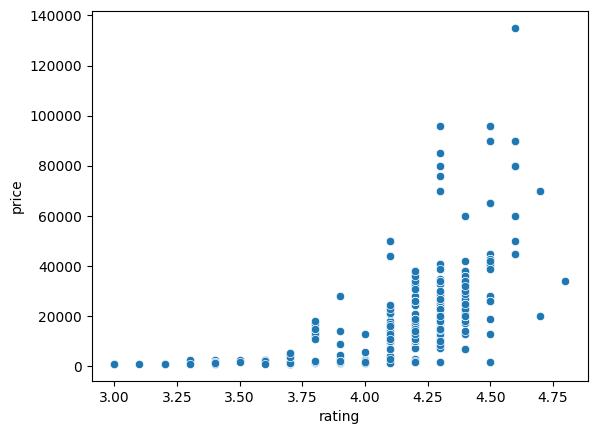

In [12]:
sns.scatterplot(data=df,x="rating",y="price") # price increased with rating

##### price

In [13]:
df.price

0      12999
1      13999
2      14999
3      16999
4      14999
       ...  
545     1499
546    25999
547    41999
548     1999
549    19999
Name: price, Length: 550, dtype: int64

In [14]:
plt.figure(figsize=(5,5))

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Axes: xlabel='price', ylabel='Count'>

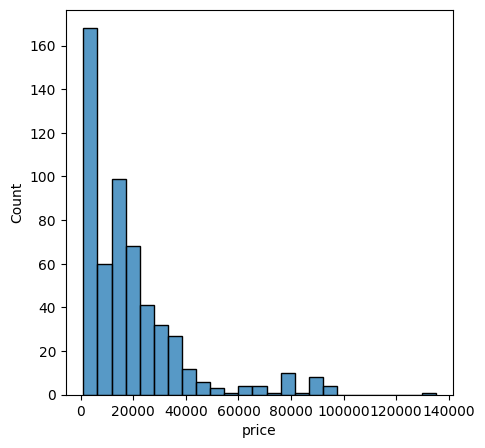

In [15]:
plt.figure(figsize=(5,5))
sns.histplot(data=df,x='price') # there is an outlier

In [16]:
df = df[df.price < 100000]

In [17]:
df[df.price > 100000].shape

(0, 36)

##### touch

In [18]:
df.touch

0      Yes
1      Yes
2      Yes
3      Yes
4      Yes
      ... 
545     No
546    Yes
547    Yes
548     No
549    Yes
Name: touch, Length: 549, dtype: object

In [19]:
df[df.touch.isnull()]

,title,rating,image,price,touch,quick_charge,gpu,processor_brand,ram,hd,...,width,os,core,clock_speed,storage,expandable,camera,secondary_camera,video,network
156,SAMSUNG GT 1200 R/I/M (Black),3.3,https://rukminim2.flixcart.com/image/416/416/x...,1999,NaN,no,no,NaN,NaN,No,...,NaN,o,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
395,KARBONN K110i (Black),3.6,https://rukminim2.flixcart.com/image/416/416/x...,1240,NaN,no,no,NaN,NaN,NaN,...,160.0,o,NaN,NaN,NaN,8.0,NaN,NaN,NaN,NaN


In [20]:
# both of these phones are keypads so lets fill them
df.touch.fillna("No",inplace=True)

<Axes: xlabel='touch', ylabel='count'>

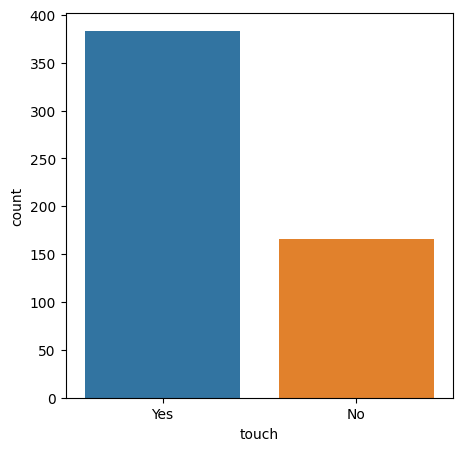

In [21]:
plt.figure(figsize=(5,5))
sns.countplot(data=df,x="touch")

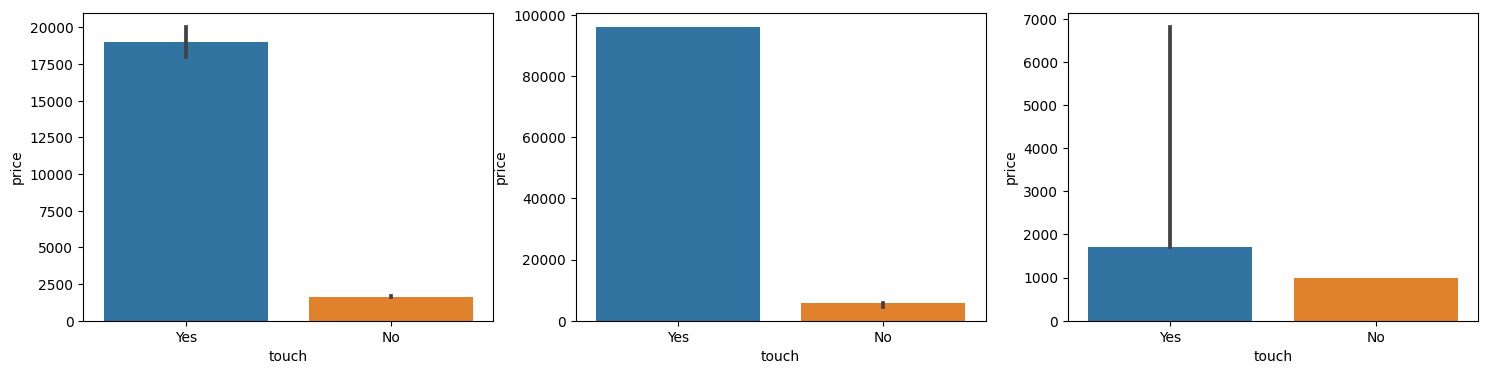

In [22]:
bars("touch",0)
# price variation between touch and keypad phones

In [23]:
df[df.touch.isnull()]

,title,rating,image,price,touch,quick_charge,gpu,processor_brand,ram,hd,...,width,os,core,clock_speed,storage,expandable,camera,secondary_camera,video,network


In [24]:
# df.touch.replace({"Yes":1, "No":0},inplace=True)

##### quick charge


In [25]:
df.quick_charge

0      yes
1      yes
2      yes
3      yes
4      yes
      ... 
545     no
546    yes
547    yes
548     no
549    yes
Name: quick_charge, Length: 549, dtype: object

<Axes: xlabel='quick_charge', ylabel='count'>

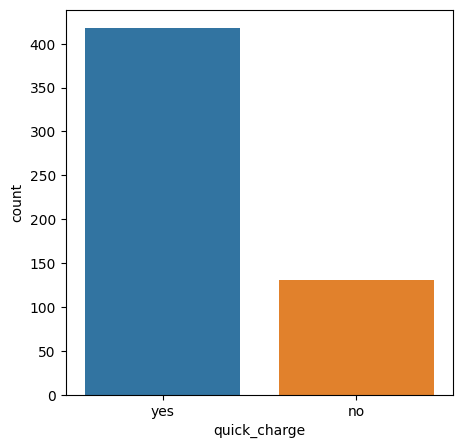

In [26]:
plt.figure(figsize=(5,5))
sns.countplot(data=df,x='quick_charge')

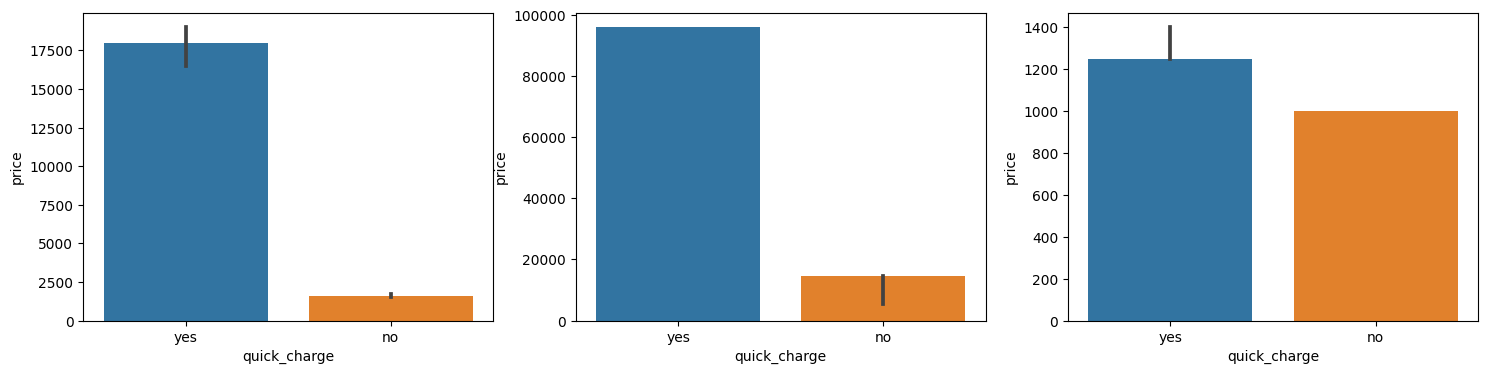

In [27]:
bars("quick_charge",0)
# quick_charge is important feature

##### gpu

In [28]:
df.gpu

0      yes
1      yes
2      yes
3      yes
4      yes
      ... 
545     no
546    yes
547     no
548     no
549     no
Name: gpu, Length: 549, dtype: object

<Axes: xlabel='gpu', ylabel='count'>

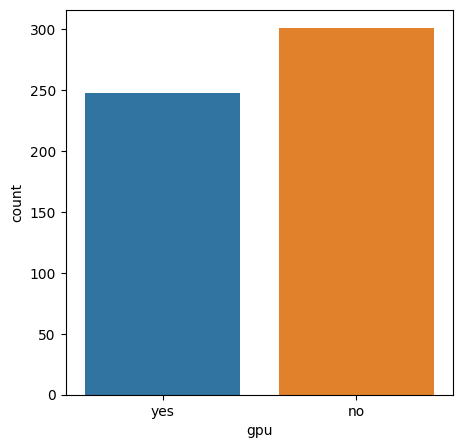

In [29]:
plt.figure(figsize=(5,5))
sns.countplot(data=df,x='gpu')

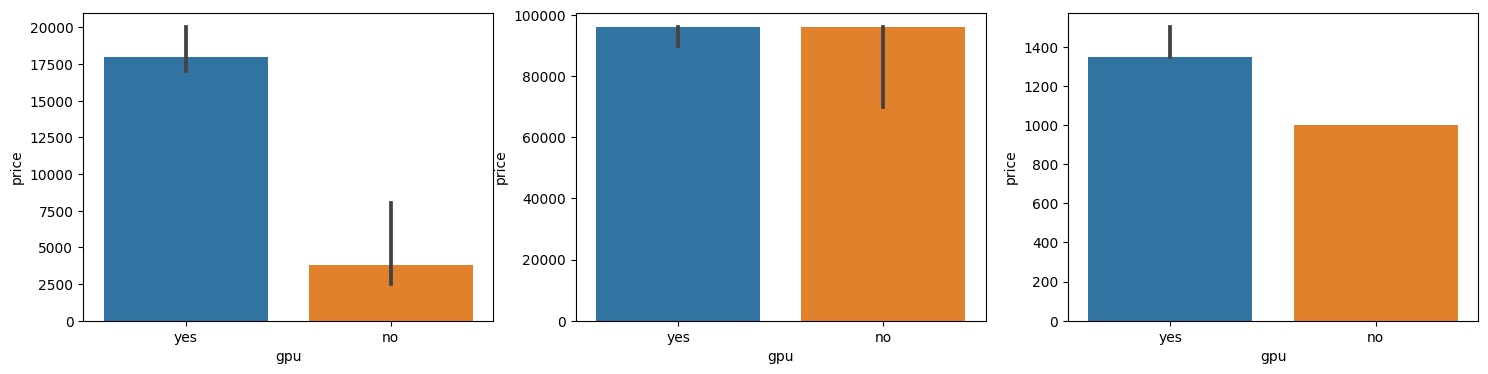

In [30]:
bars("gpu",0)
# gpu might be important when used with other features

In [31]:
# df[['quick_charge','gpu']] = df[['quick_charge','gpu']].replace({"yes":1, "no":0})

##### processor_brand

In [32]:
df.processor_brand

0        Mediatek
1        Mediatek
2      Snapdragon
3      Snapdragon
4      Snapdragon
          ...    
545           NaN
546    Snapdragon
547    Snapdragon
548           NaN
549    Snapdragon
Name: processor_brand, Length: 549, dtype: object

In [33]:
a = df[df.processor_brand.isnull()]
a["price"].describe()

count      124.000000
mean      2275.016129
std       2867.436647
min        999.000000
25%       1435.000000
50%       1599.000000
75%       1999.000000
max      19999.000000
Name: price, dtype: float64

In [34]:
a[a.price > 10000].title # only 2 phones are smart phones

129    OnePlus Nord CE 2 Lite 5G (Blue Tide, 128 GB) ...
250    OnePlus Nord CE 2 Lite 5G (Black Dusk, 128 GB)...
344    realme Narzo N53 (Feather Black, 128 GB)  (6 G...
376    realme Narzo N53 (Feather Black, 64 GB)  (4 GB...
521    realme Narzo N53 (Feather Gold, 128 GB)  (6 GB...
Name: title, dtype: object

In [35]:
# one plus have mediatek and narzo has speedtrun
df.loc[[129,250],'processor_brand'] = df.loc[[129,250],'processor_brand'].fillna("Mediatek")
df.loc[[344,376,521],'processor_brand'] = df.loc[[344,376,521],'processor_brand'].fillna("Spreadtrum")

In [36]:
df.loc[[129,250,344,376,521],'processor_brand']

129      Mediatek
250      Mediatek
344    Spreadtrum
376    Spreadtrum
521    Spreadtrum
Name: processor_brand, dtype: object

In [37]:
df[df.touch=="No"][['processor_brand','brand']].value_counts()

processor_brand  brand   
Unisoc           Nokia       11
Mediatek         Nokia        9
                 Micromax     7
Unisoc           itel         5
Spreadtrum       Micromax     3
                 Nokia        3
Mediatek         LAVA         2
Spreadtrum       TARA         2
                 itel         2
AMD              KARBONN      1
Mediatek         I            1
Spreadtrum       DIZO         1
Name: count, dtype: int64

In [38]:
df[df.processor_brand.isnull()].brand.value_counts()

brand
Kechaoda      31
itel          19
LAVA          18
KARBONN        9
Snexian        6
SAMSUNG        6
MTR            4
Nokia          3
I              3
IAIR           2
Vox            2
Micromax       2
Motorola       2
UiSmart        2
Lvix           1
FONEME         1
ringme         1
BlackZone      1
SIAVANTAGE     1
HOTLINE        1
GFive          1
Cellecor       1
Jio            1
SAREGAMA       1
Name: count, dtype: int64

for keypad mobiles processor is not so important so lets remove them

In [39]:
df.loc[df.touch == "No",'processor_brand'] = "unknown"

In [40]:
df[df.touch == "No"]['processor_brand']

25     unknown
35     unknown
36     unknown
47     unknown
58     unknown
        ...   
537    unknown
541    unknown
544    unknown
545    unknown
548    unknown
Name: processor_brand, Length: 166, dtype: object

<Axes: xlabel='processor_brand', ylabel='count'>

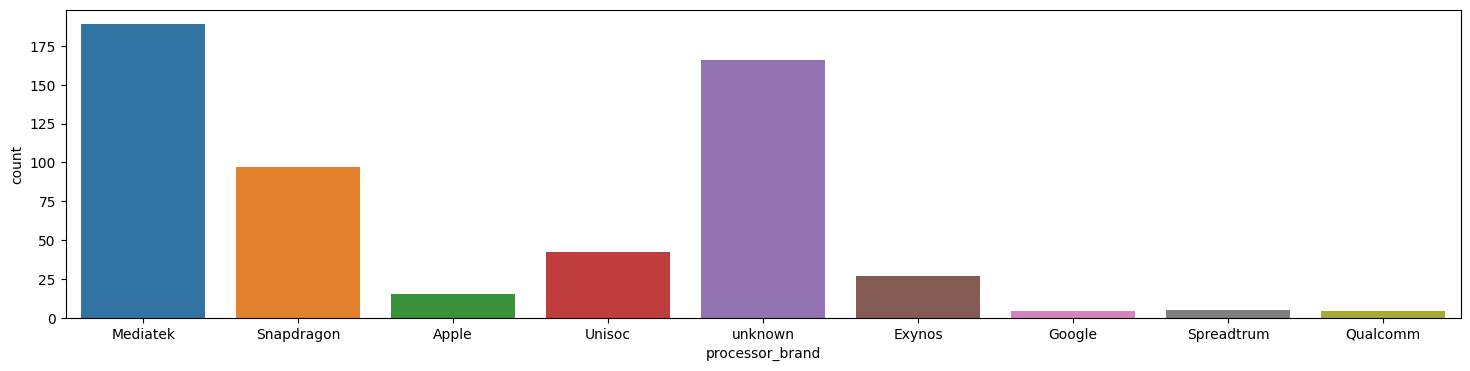

In [41]:
plt.figure(figsize=(18,4))
sns.countplot(data=df,x="processor_brand")

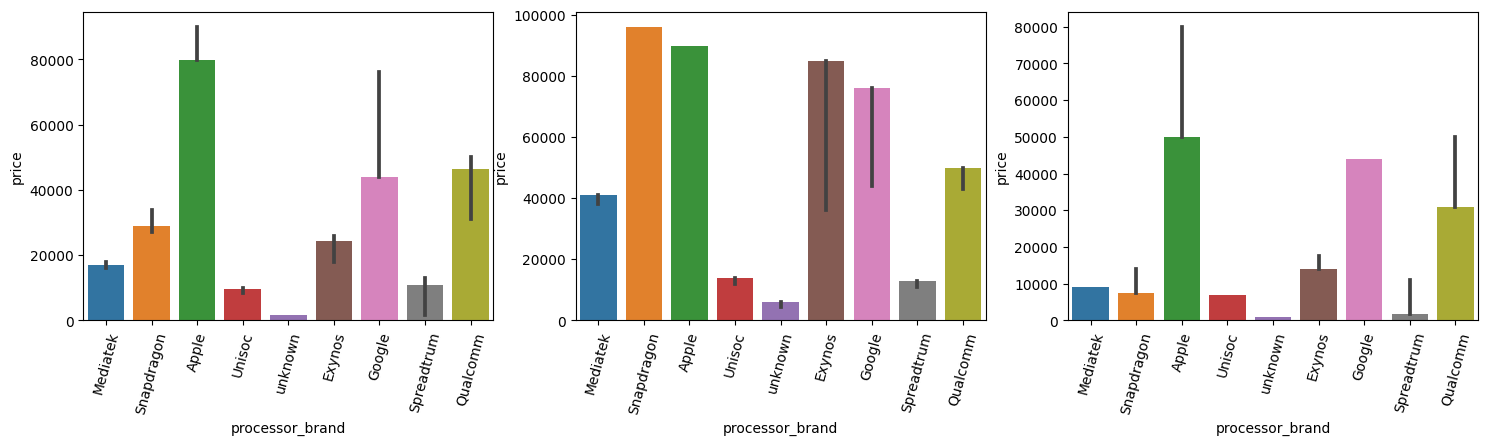

In [42]:
bars("processor_brand",75)
# some processor brands might be useful when used with other features since they are showing different variations in different graphs

##### ram

In [43]:
df.ram

0      4.000
1      6.000
2      8.000
3      6.000
4      8.000
       ...  
545    0.032
546    8.000
547    8.000
548    0.032
549    8.000
Name: ram, Length: 549, dtype: float64

In [44]:
# df[df.ram.isnull()] # most of the phones are either apple or keypad phones

In [45]:
df.groupby('touch').ram.median()

touch
No     0.032
Yes    8.000
Name: ram, dtype: float64

In [46]:
# lets fill keypad mobiles ram with 0.032
df.loc[df.touch=="No","ram"] = df.loc[df.touch == "No","ram"].fillna(0.032)

In [47]:
# most of the iphones have 6 gb ram so lets fil
df.ram.fillna(6,inplace=True)

<Axes: xlabel='ram', ylabel='price'>

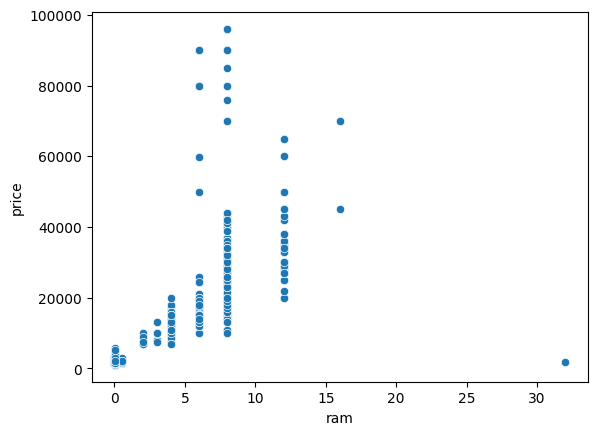

In [48]:
sns.scatterplot(data=df,x="ram",y="price") # there seems to be an outlier

In [49]:
# there is an outlier
df[df.ram > 30]  # this data is wrong

,title,rating,image,price,touch,quick_charge,gpu,processor_brand,ram,hd,...,width,os,core,clock_speed,storage,expandable,camera,secondary_camera,video,network
237,itel Circle 1 (Black),4.0,https://rukminim2.flixcart.com/image/416/416/x...,1899,No,no,no,unknown,32.0,NaN,...,480.0,o,NaN,NaN,32.0,NaN,3.0,NaN,NaN,2G


In [50]:
df = df[df.ram < 30]

<Axes: xlabel='ram', ylabel='Count'>

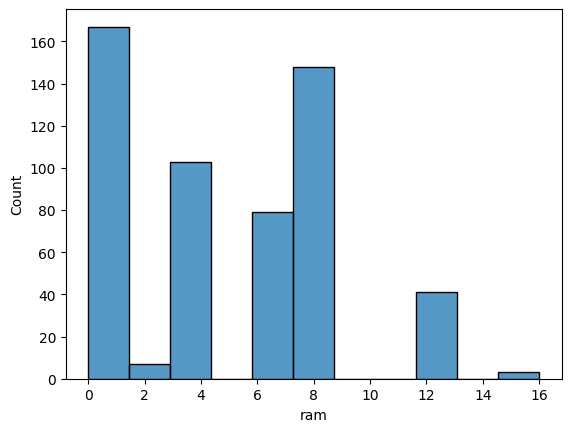

In [51]:
sns.histplot(data=df,x="ram")

##### hd

In [52]:
df.hd

0      Yes
1      Yes
2      Yes
3      Yes
4      Yes
      ... 
545    NaN
546    Yes
547    NaN
548    NaN
549    NaN
Name: hd, Length: 548, dtype: object

In [53]:
df[df.hd.isna()][(df.touch == "Yes") & (df.price < 7000)].shape


C:\Users\smoha\AppData\Local\Temp\ipykernel_16184\3521280926.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df[df.hd.isna()][(df.touch == "Yes") & (df.price < 7000)].shape


(6, 36)

In [54]:
# basically all smartphones above 7000 will have hd resolution
df.loc[(df.touch == "Yes") & (df.price > 7000),'hd'] = df[(df.touch == "Yes") & (df.price > 7000)].hd.fillna("Yes")

In [55]:
df[df.hd.isnull()].price.describe()

count     108.000000
mean     2107.351852
std      1305.475531
min       999.000000
25%      1499.000000
50%      1699.000000
75%      2099.000000
max      6999.000000
Name: price, dtype: float64

In [56]:
df.hd.fillna("No",inplace=True)

<Axes: xlabel='hd', ylabel='count'>

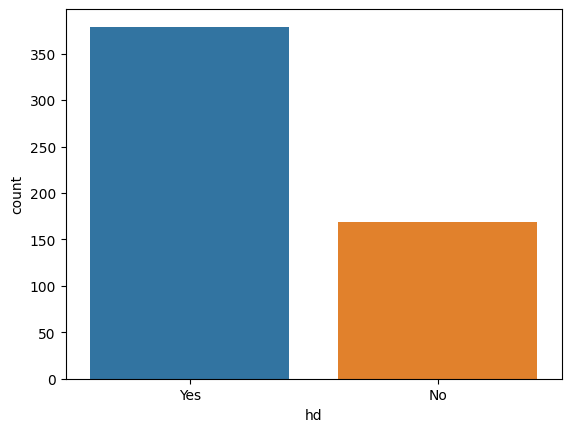

In [57]:
sns.countplot(data=df,x="hd")

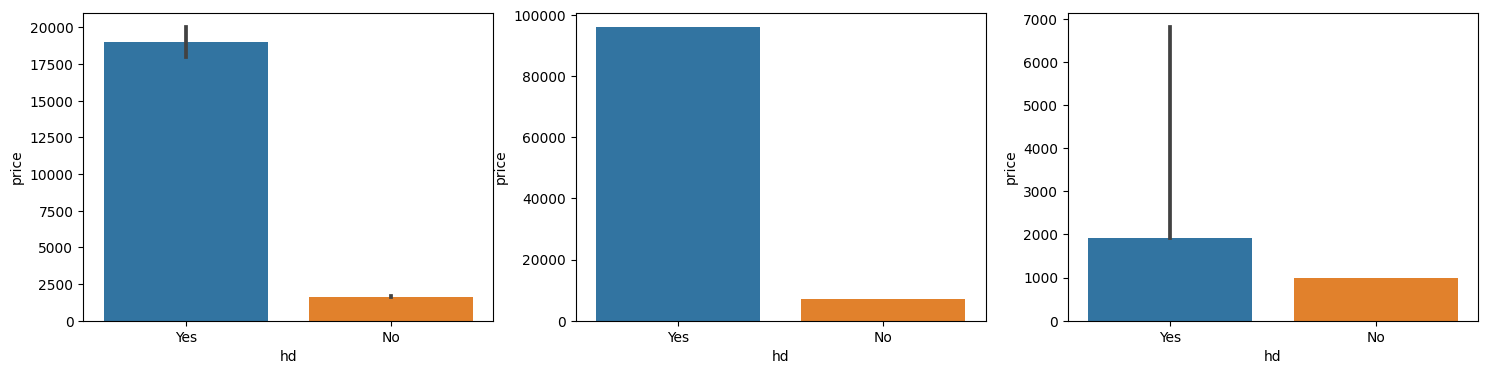

In [58]:
bars("hd")
# hd might be useful features since they are showing different variations in different graphs

In [59]:
df.hd.isnull().sum()

0

##### battery

In [60]:
df.battery

0      5000.0
1      5000.0
2      5000.0
3      5000.0
4      5000.0
        ...  
545     800.0
546    5000.0
547    5160.0
548    2500.0
549    6000.0
Name: battery, Length: 548, dtype: float64

In [61]:
df.battery.isnull().sum()

10

In [62]:
df.groupby("touch").battery.median()

touch
No     1000.0
Yes    5000.0
Name: battery, dtype: float64

In [63]:
df.loc[df.touch == "Yes","battery"] = df.loc[df.touch == "Yes","battery"].fillna(5000)

In [64]:
df.battery.fillna(1000,inplace=True)

<Axes: xlabel='battery', ylabel='Count'>

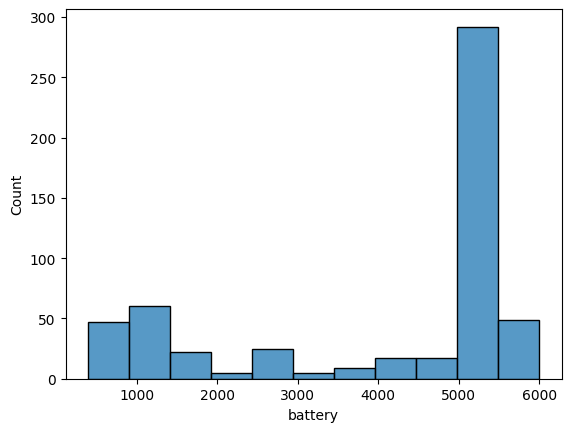

In [65]:
sns.histplot(data=df,x="battery")

<Axes: xlabel='battery', ylabel='price'>

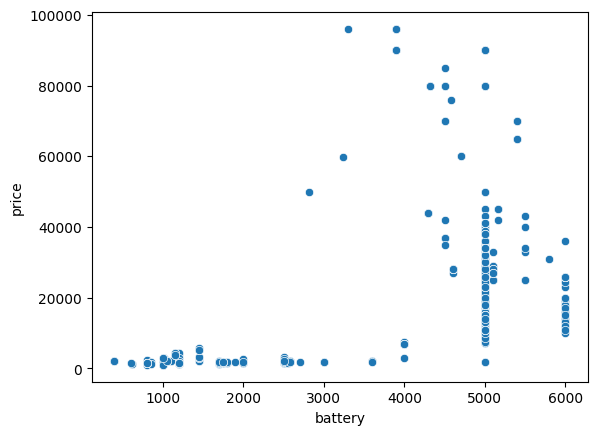

In [66]:
sns.scatterplot(data=df,x="battery",y="price") # battery effects price

#####  battery_type

In [67]:
df.battery_type.isnull().sum()

233

In [68]:
df.battery_type.value_counts()

battery_type
Lithium Polymer                                 85
Li-Ion                                          67
Lithium-ion Polymer                             57
Lithium Ion                                     35
Lithium-ion                                     14
Li-Po                                            8
Lithium                                          8
Li-ion                                           7
Li_ion                                           5
Lithium-ion Battery                              4
LI-ION                                           4
Li-Polymer battery                               2
lithium ion                                      2
5000mAh Massive Battery (NON REMOVABLE)          2
Li-Polymer                                       2
Non-Removable Battery                            2
Li-IOn                                           1
50%battery 30 minutes                            1
Lithium Ion Battery                              1
Li ion            

In [69]:
df.battery_type = df.battery_type.apply(lambda x: x if pd.isna(x) else x.replace("_"," ").replace("-"," ").lower())

In [70]:
vc = df.battery_type.value_counts()
vc

battery_type
lithium polymer                                 85
li ion                                          85
lithium ion polymer                             57
lithium ion                                     51
li po                                            8
lithium                                          8
lithium ion battery                              5
li polymer                                       3
li polymer battery                               2
non removable battery                            2
5000mah massive battery (non removable)          2
li ion, 2500 mah                                 1
50%battery 30 minutes                            1
removable                                        1
massive battery                                  1
5000mah (typ) li polymer battery                 1
1 lithium ion batteries required. (included)     1
non removable                                    1
Name: count, dtype: int64

In [71]:
ind = vc[vc > 50].index

In [72]:
df.battery_type = df.battery_type.apply(lambda x : x if x in ind else "other")

<Axes: xlabel='battery_type', ylabel='count'>

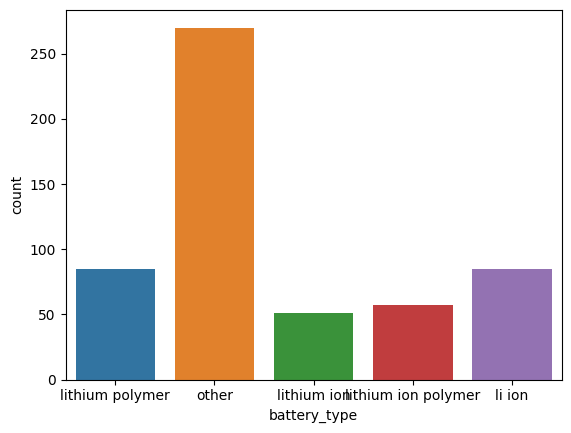

In [73]:
sns.countplot(data=df,x="battery_type")

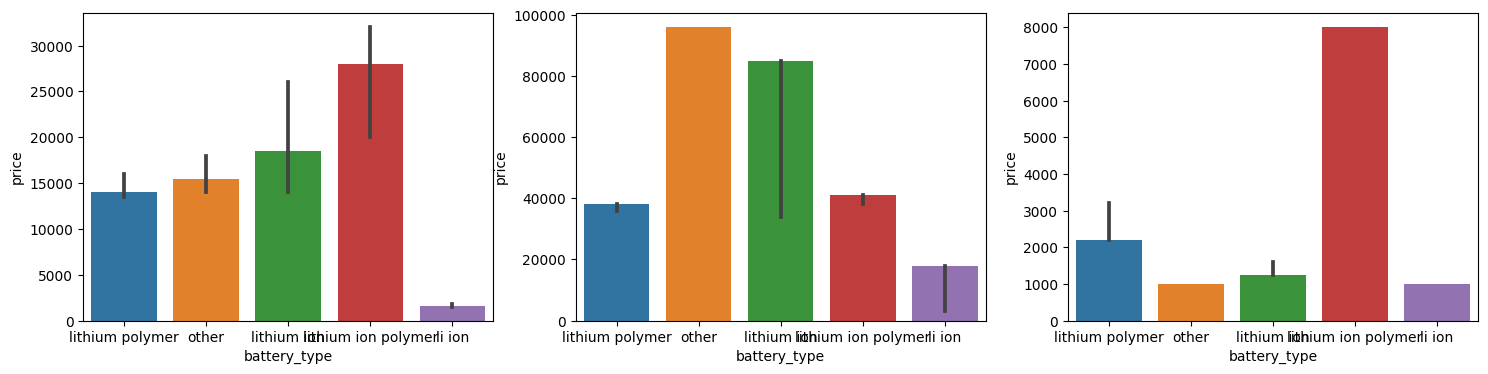

In [74]:
bars("battery_type")

##### warranty_time

In [75]:
df.warranty_time

0      12.0
1      12.0
2       NaN
3      12.0
4       NaN
       ... 
545     NaN
546     NaN
547     NaN
548     NaN
549    12.0
Name: warranty_time, Length: 548, dtype: float64

In [76]:
df.warranty_time.value_counts()

warranty_time
12.0    274
24.0      1
Name: count, dtype: int64

In [77]:
# this column is not necessary since only one category is dominating and remaining are null

##### java

In [78]:
df.java.unique()

array([nan, 'No', 'Yes'], dtype=object)

In [79]:
df[df.touch == "No"].java.value_counts()

java
No     54
Yes     3
Name: count, dtype: int64

In [80]:
# not considering this feature because of many null values
# this is only important incase of keypad phones but in that case one category is dominating

##### brand

In [81]:
df.brand

0          POCO
1          POCO
2      Motorola
3          POCO
4      Motorola
         ...   
545    SAREGAMA
546    Motorola
547        IQOO
548    Kechaoda
549        IQOO
Name: brand, Length: 548, dtype: object

In [82]:
df.brand = df.brand.apply(lambda x : x.lower())

In [83]:
vc = df.brand.value_counts()
vc

brand
redmi         64
samsung       50
realme        47
poco          45
itel          42
motorola      37
kechaoda      31
nokia         29
vivo          24
infinix       24
lava          21
oneplus       18
apple         15
oppo          14
micromax      12
karbonn       10
tecno          9
nothing        9
iqoo           7
snexian        6
google         4
mtr            4
i              4
honor          3
tara           2
vox            2
iair           2
uismart        2
gfive          1
jio            1
blackzone      1
cellecor       1
hotline        1
siavantage     1
lvix           1
ringme         1
dizo           1
foneme         1
saregama       1
Name: count, dtype: int64

In [84]:
ind = list(vc[vc < 3 ].index)
ind

['tara',
 'vox',
 'iair',
 'uismart',
 'gfive',
 'jio',
 'blackzone',
 'cellecor',
 'hotline',
 'siavantage',
 'lvix',
 'ringme',
 'dizo',
 'foneme',
 'saregama']

In [85]:
# lets substitute them with others
df.brand = df.brand.apply(lambda x : "other" if x in ind else x)

In [86]:
df.brand.nunique()

25

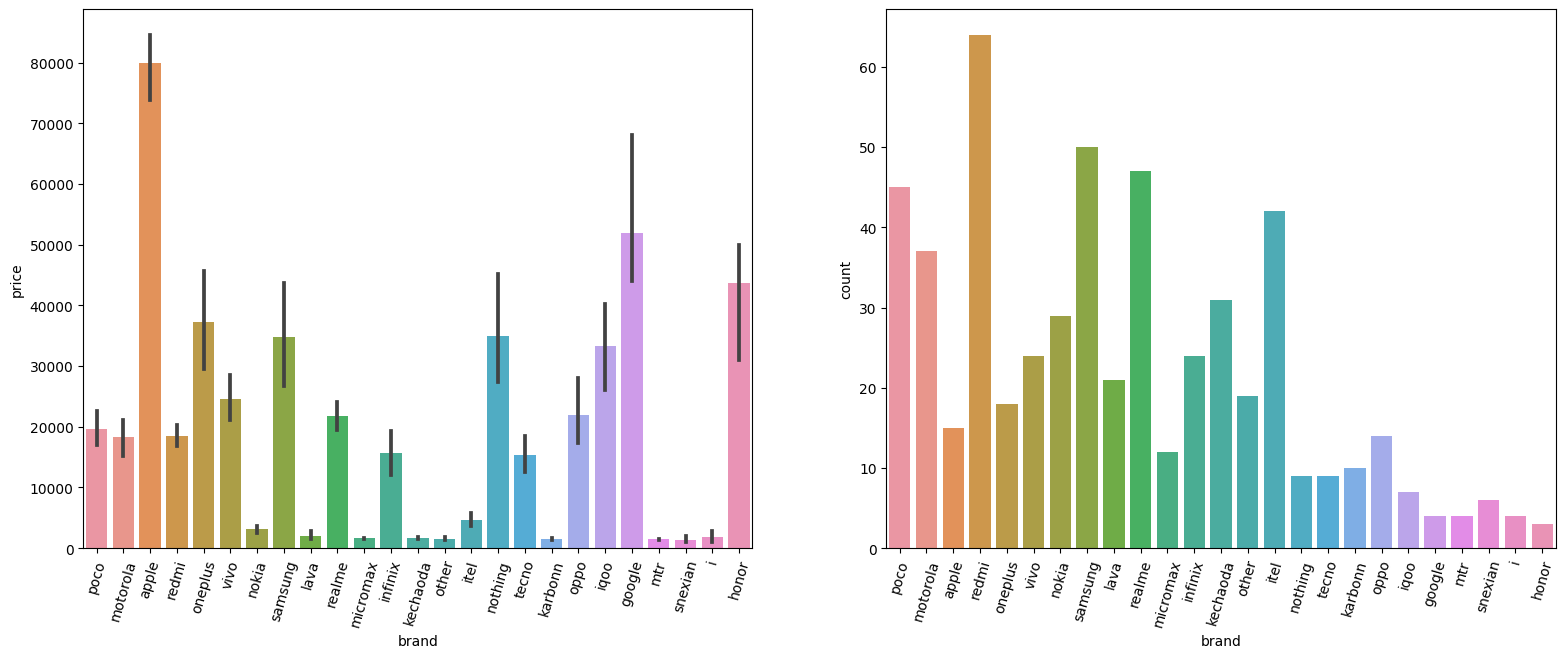

In [87]:
fig,ax = plt.subplots(ncols=2,figsize=(19,7))
sns.barplot(data=df,x="brand",y="price",ax=ax[0])
ax[0].set_xticklabels(ax[0].get_xticklabels(),rotation=74)

sns.countplot(data=df,x="brand",ax=ax[1])
ax[1].set_xticklabels(ax[1].get_xticklabels(),rotation=74)

plt.show()

##### headset, charger, warranty, cable

In [88]:
df.loc[:,["headset","charger","warranty","cable"]].isnull().sum()

headset     0
charger     0
warranty    0
cable       0
dtype: int64

In [89]:
df.headset

0       True
1       True
2       True
3       True
4       True
       ...  
545    False
546     True
547    False
548     True
549    False
Name: headset, Length: 548, dtype: bool

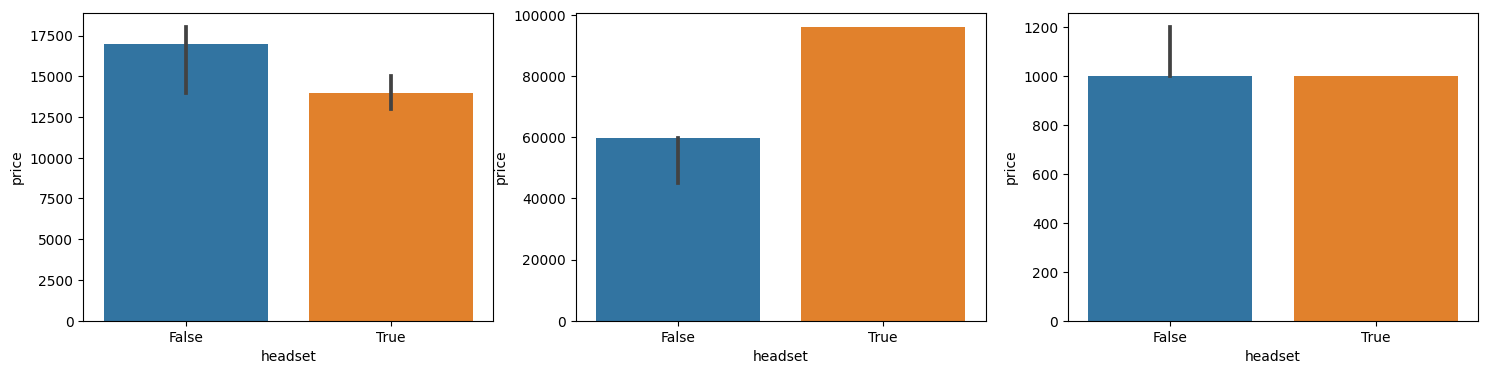

In [90]:
bars("headset")
# this has irregular effect so this may not make any impact

In [91]:
df.charger

0       True
1       True
2       True
3       True
4       True
       ...  
545     True
546     True
547    False
548     True
549    False
Name: charger, Length: 548, dtype: bool

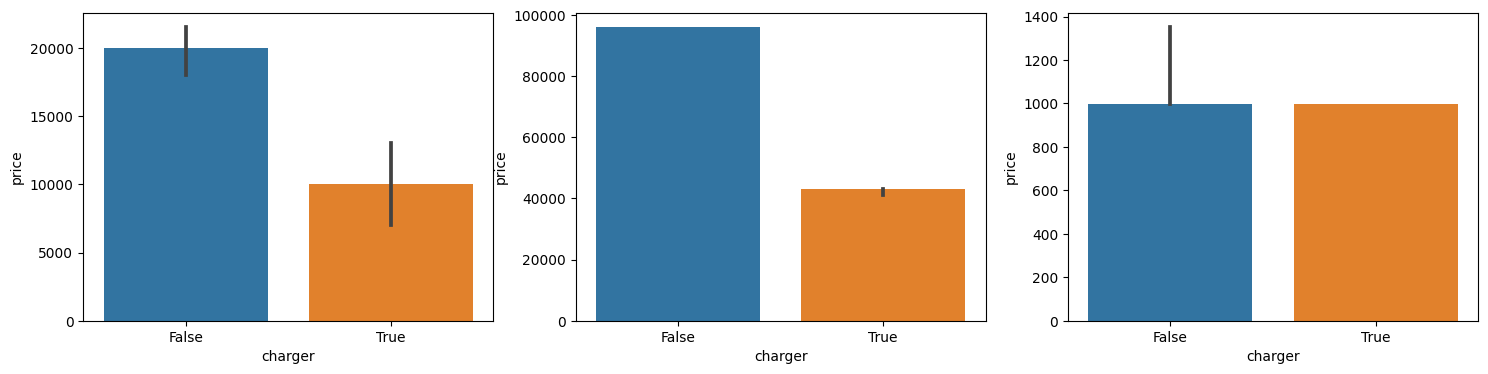

In [92]:
bars("charger")
# charger has impact since most of the branded (costly) mobiles dont give chargers for free

In [93]:
df.cable

0       True
1       True
2      False
3       True
4      False
       ...  
545    False
546    False
547    False
548    False
549    False
Name: cable, Length: 548, dtype: bool

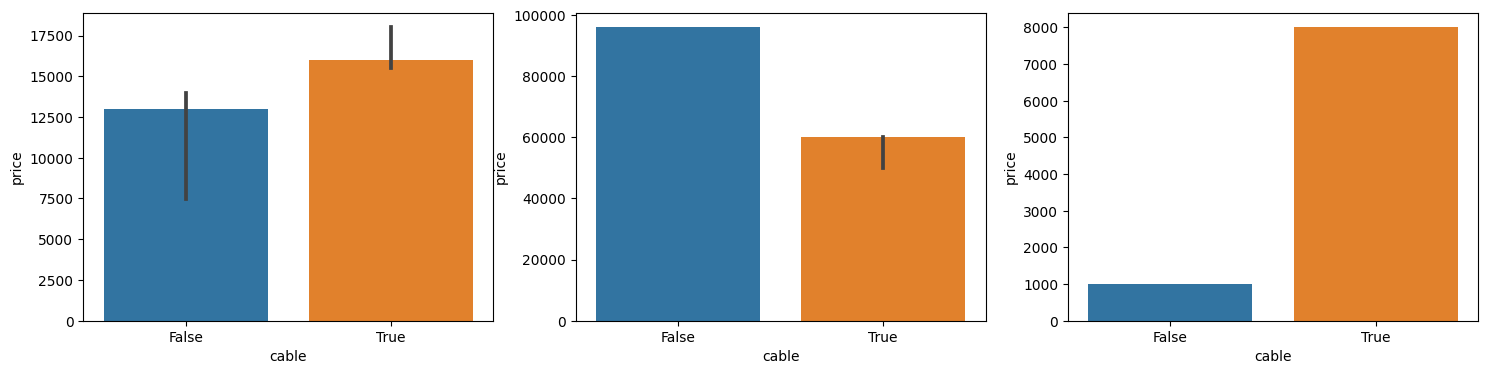

In [94]:
bars("cable")
# this has irregular effect so this may not make any impact

In [95]:
df.warranty

0       True
1       True
2      False
3       True
4      False
       ...  
545     True
546    False
547    False
548    False
549    False
Name: warranty, Length: 548, dtype: bool

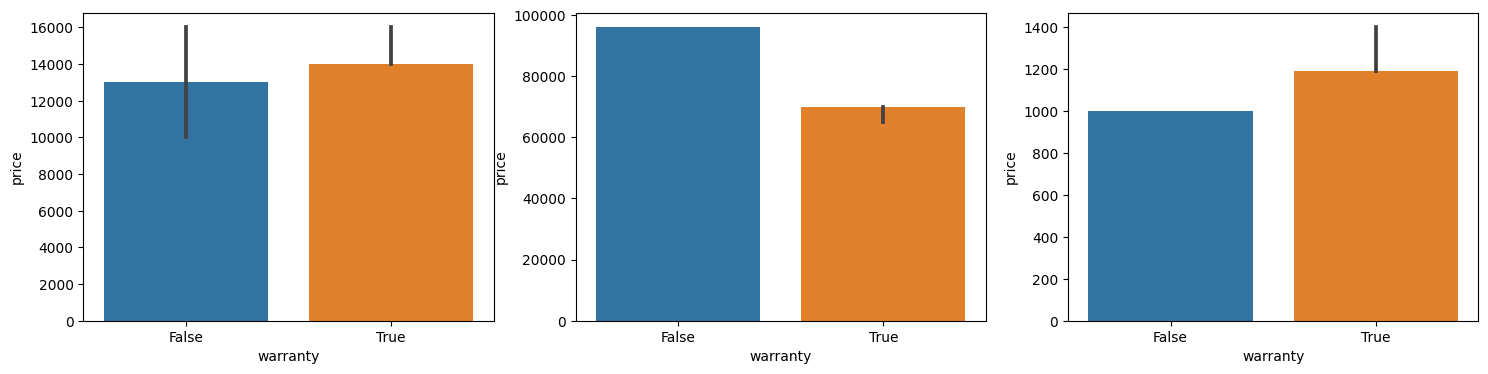

In [96]:
bars("warranty")
# this has irregular effect so this may not make any impact

##### pro

In [97]:
df.pro

0      False
1      False
2      False
3       True
4      False
       ...  
545    False
546    False
547     True
548    False
549    False
Name: pro, Length: 548, dtype: bool

In [98]:
df.pro.isnull().sum()

0

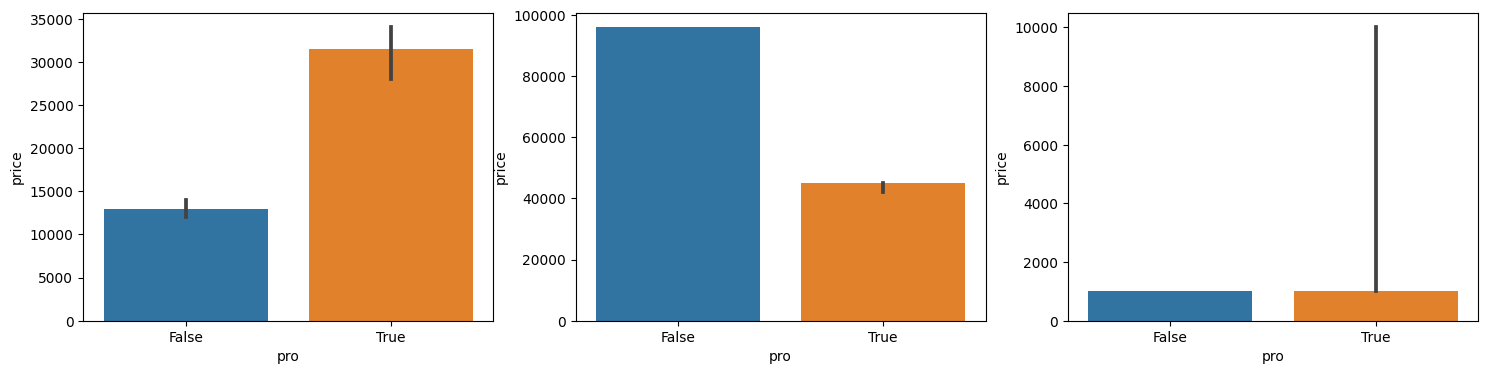

In [99]:
bars("pro")
# this depends on company so not an important feature

##### model

In [100]:
df.model

0           M6
1           M6
2          G34
3           M6
4          G34
        ...   
545    Carvaan
546       Edge
547       Neo9
548         A8
549        Z9X
Name: model, Length: 548, dtype: object

In [101]:
df.model.nunique()

173

In [102]:
vc = df.model.value_counts()
vc[vc > 10]

model
Galaxy    43
12        29
Note      18
iPhone    15
13C       15
M6        13
Narzo     13
SMART     12
X6        11
Edge      11
Name: count, dtype: int64

<Axes: xlabel='model', ylabel='price'>

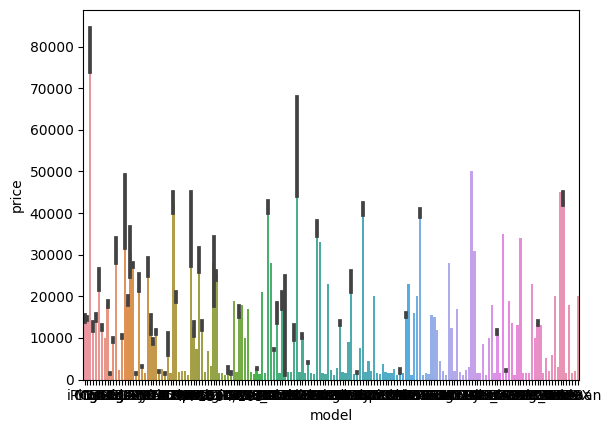

In [103]:
sns.barplot(data=df,x="model",y="price")

In [104]:
# most of the model names depend on the brand name so lets just avoid this since we have already used brand feature

##### color1, color2

In [105]:
df.color1.isnull().sum()

0

In [106]:
df.color1.nunique()

193

In [107]:
vc = df.color1.value_counts()
ind = vc[vc > 9].index
ind

Index(['Black', 'Blue', 'Dark', 'White', 'Red', 'Green', 'Gold'], dtype='object', name='color1')

In [108]:
df['color1'] = df.color1.apply(lambda x : x if x in ind else "other")

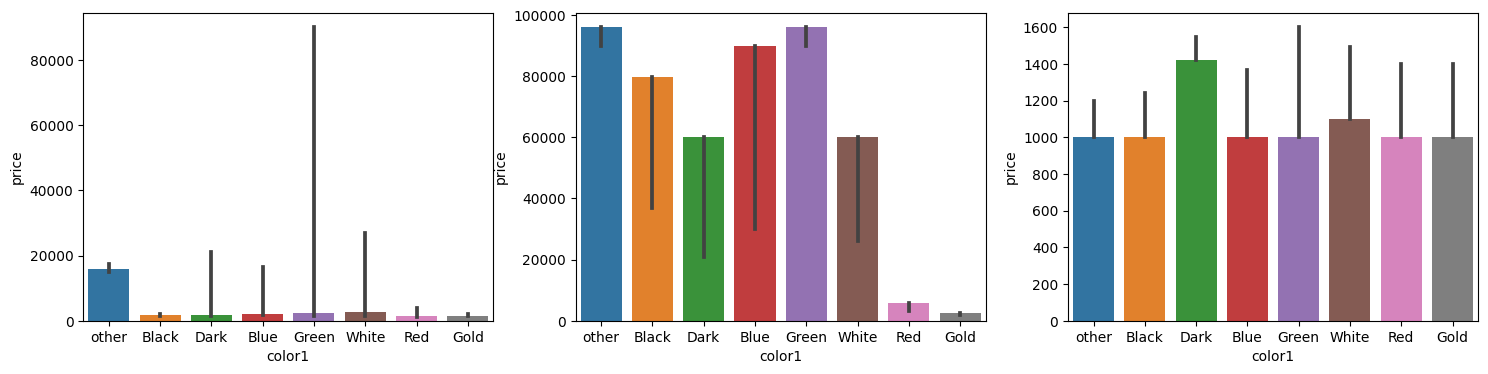

In [109]:
bars("color1")
# doesn't have much effect

In [110]:
df.color2.isnull().sum()

159

In [111]:
# same happens with color2

##### sim

In [112]:
df.sim

0        Dual
1        Dual
2        Dual
3        Dual
4        Dual
        ...  
545      Dual
546      Dual
547      Dual
548    Triple
549      Dual
Name: sim, Length: 548, dtype: object

In [113]:
df.sim.value_counts()

sim
Dual      533
Single     10
Triple      4
Four        1
Name: count, dtype: int64

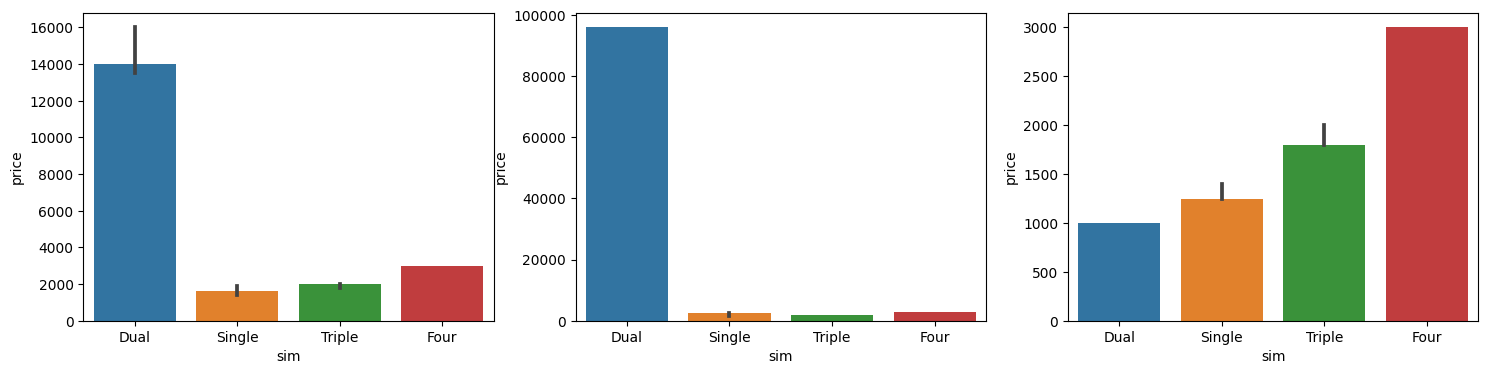

In [114]:
bars("sim")
# this has irregular effect so this may not make any impact

In [115]:
# one category is dominating others so lets remove it

##### display

In [116]:
df.display

0      17.12
1      17.12
2      16.51
3      17.25
4      16.51
       ...  
545     4.57
546    17.02
547    17.22
548     8.89
549    17.07
Name: display, Length: 548, dtype: float64

In [117]:
df.display.isnull().sum()

1

In [118]:
df.groupby("touch").display.mean()

touch
No      5.057134
Yes    16.786710
Name: display, dtype: float64

In [119]:
df[df.display.isnull()]

,title,rating,image,price,touch,quick_charge,gpu,processor_brand,ram,hd,...,width,os,core,clock_speed,storage,expandable,camera,secondary_camera,video,network
156,SAMSUNG GT 1200 R/I/M (Black),3.3,https://rukminim2.flixcart.com/image/416/416/x...,1999,No,no,no,unknown,0.032,No,...,NaN,o,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [120]:
df.display.fillna(5.057134,inplace=True)

<Axes: xlabel='display', ylabel='price'>

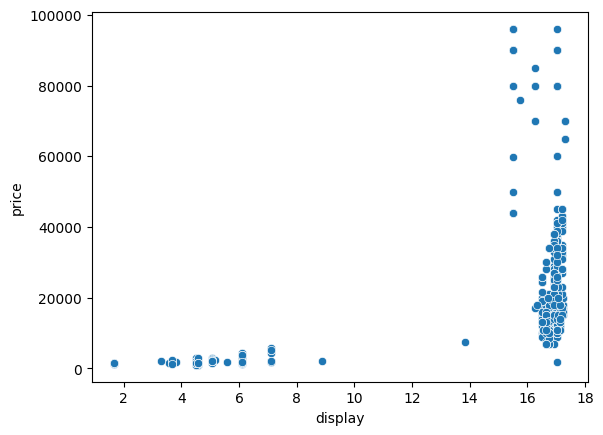

In [121]:
sns.scatterplot(data=df,x="display",y="price")

In [122]:
# by seeing the fig we can say the prices are divided based on the display sie so lets divide them as categories
df.display = df.display.apply(lambda x : 1 if x >= 14 else 0)

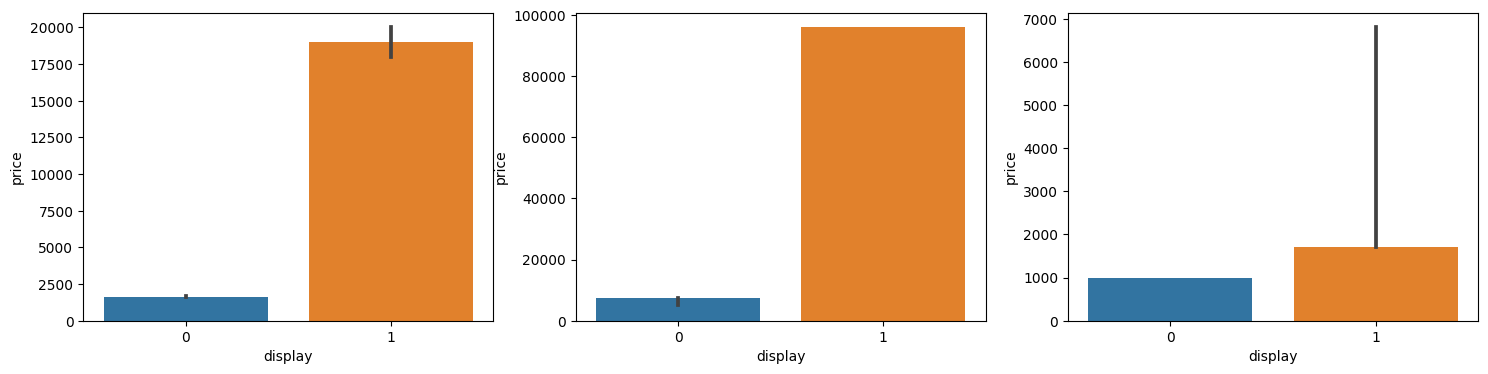

In [123]:
bars("display")
# display size clearly effects size

##### height width

In [124]:
df[['height','width']].isnull().sum()

height    3
width     3
dtype: int64

<Axes: xlabel='height', ylabel='price'>

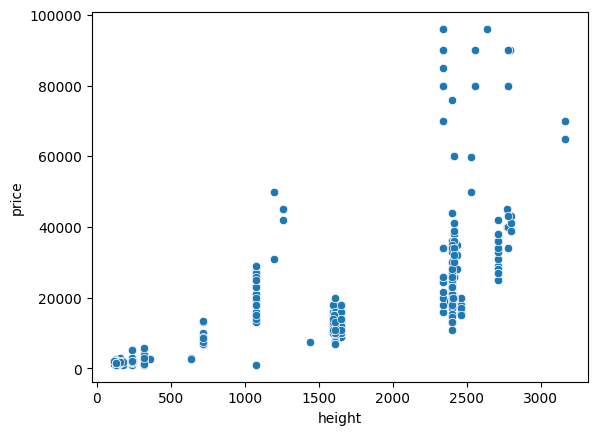

In [125]:
sns.scatterplot(data=df,x="height",y="price")

<Axes: xlabel='width', ylabel='price'>

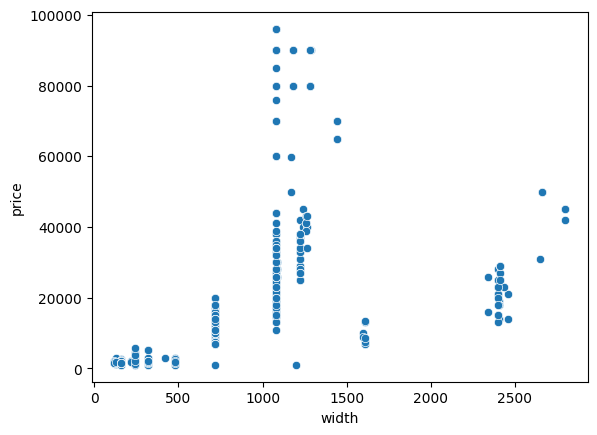

In [126]:
sns.scatterplot(data=df,x="width",y="price")

In [127]:
df[df.height.isnull()].price, df[df.width.isnull()].price

(156    1999
 162    1599
 541    1549
 Name: price, dtype: int64,
 156    1999
 162    1599
 541    1549
 Name: price, dtype: int64)

In [128]:
# all the missing values are for keypads
df.groupby("touch").height.median(), df.groupby("touch").width.median()

(touch
 No      240.0
 Yes    2340.0
 Name: height, dtype: float64,
 touch
 No      240.0
 Yes    1080.0
 Name: width, dtype: float64)

In [129]:
df.height.fillna(240,inplace=True)
df.width.fillna(240,inplace=True)

In [130]:
# relation between width and price is not as height and price so remove price

##### os

In [131]:
df.os

0      a13
1      a13
2      a14
3      a13
4      a14
      ... 
545      o
546    a14
547    a14
548      o
549    a14
Name: os, Length: 548, dtype: object

In [132]:
df.os.value_counts() # o means others

os
a13    191
o      187
a14    124
a0      19
a12     15
a1       7
a11      4
a10      1
Name: count, dtype: int64

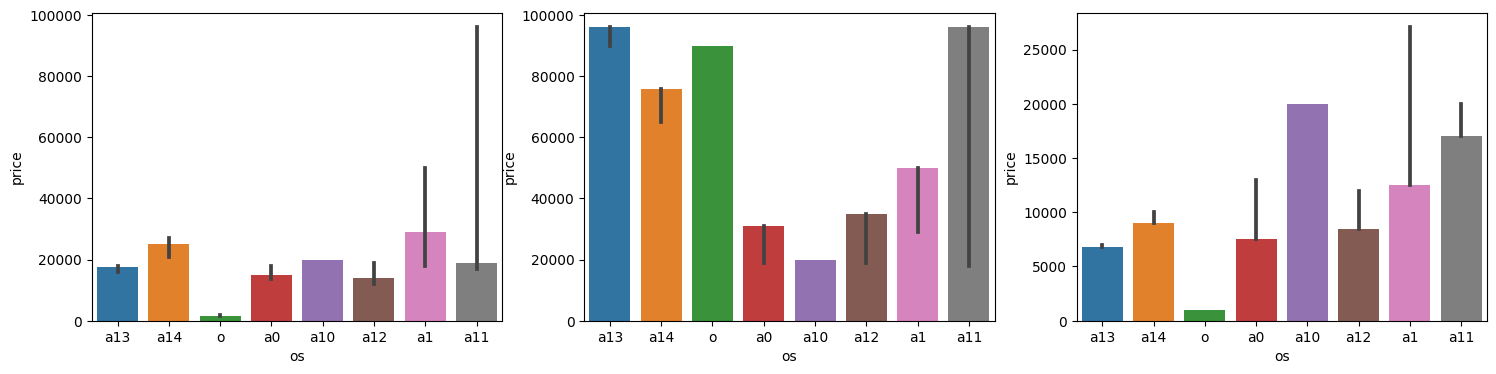

In [133]:
bars('os')
# when we see median graph only others is different remaining are almost same so lets ignore this column

##### core

In [134]:
df.core

0        Octa
1        Octa
2        Octa
3        Octa
4        Octa
        ...  
545    Single
546      Octa
547      Octa
548       NaN
549      Octa
Name: core, Length: 548, dtype: object

In [135]:
df.core.isnull().sum()

153

In [136]:
df[df.core.isnull()].groupby("touch").title.count()
# most of them are keypads (single core)

touch
No     137
Yes     16
Name: title, dtype: int64

In [137]:
df.loc[(df.touch == "Yes") & df.core.isnull(),'brand']

109    oneplus
149       itel
199       itel
204       itel
268     google
304      tecno
319     google
338      apple
423      nokia
424      nokia
481       itel
484     realme
498    oneplus
515     google
538       iqoo
542     google
Name: brand, dtype: object

In [138]:
df.groupby("touch")['core'].apply(lambda x: x.mode().iloc[0])

touch
No     Single
Yes      Octa
Name: core, dtype: object

In [139]:
df.loc[df.touch == "No",'core'] = df.loc[df.touch == "No", 'core'].fillna("Single")
df.loc[df.touch == "Yes",'core'] = df.loc[df.touch == "Yes", 'core'].fillna("Octa")

In [140]:
df.core.isnull().sum()

0

In [141]:
df.core.value_counts()

core
Octa      369
Single    164
Hexa       14
Dual        1
Name: count, dtype: int64

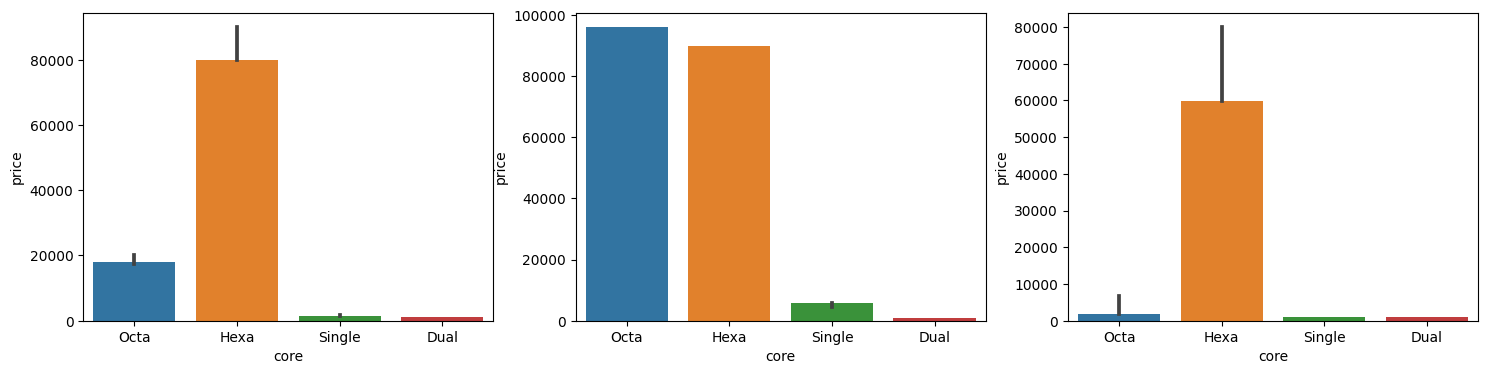

In [142]:
bars(df.core)

In [143]:
# lets substitute dual with singel since it is only one and both prices are almost same
df.loc[df.core == "Dual","core"] = "Single"

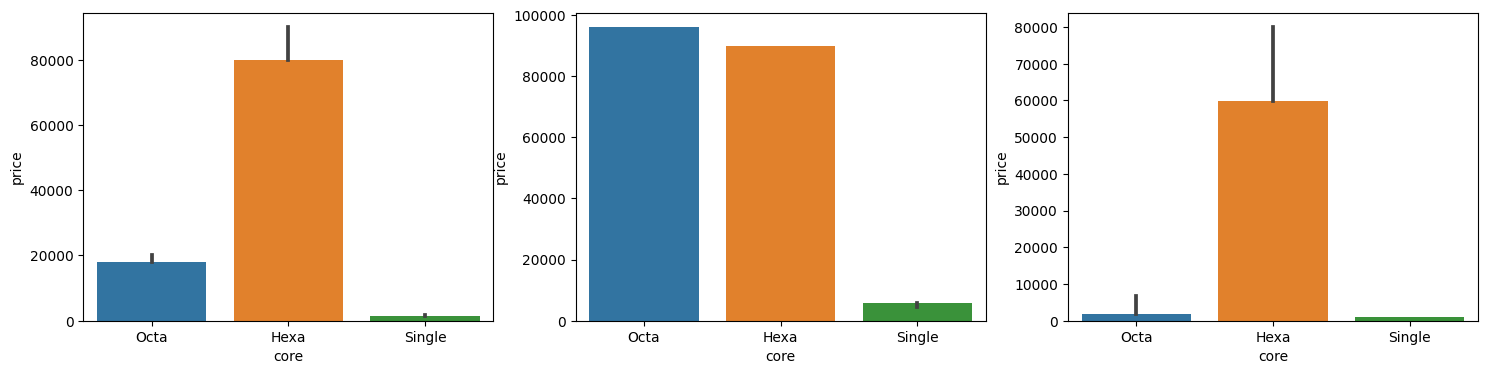

In [144]:
bars("core") # This column is important

##### clock_speed

In [145]:
df.clock_speed

0       2.200
1       2.200
2       2.200
3       2.200
4       2.200
        ...  
545    32.768
546     2.400
547     3.200
548       NaN
549     2.200
Name: clock_speed, Length: 548, dtype: float64

In [146]:
df.clock_speed.isnull().sum()

72

In [147]:
df.groupby("display").clock_speed.median()

display
0    1.2
1    2.2
Name: clock_speed, dtype: float64

<Axes: xlabel='clock_speed', ylabel='price'>

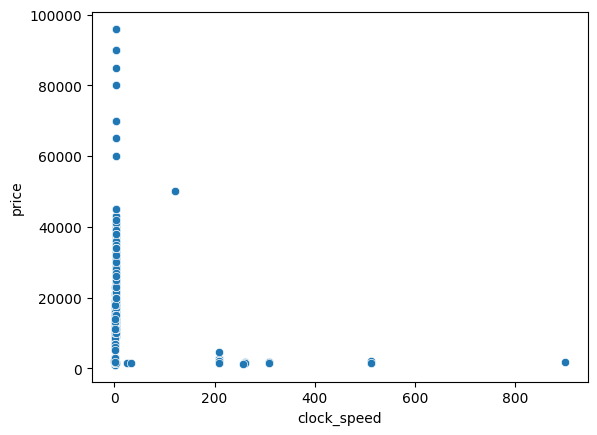

In [148]:
sns.scatterplot(data=df,x="clock_speed",y="price")
# there isn't much variance in this column so we can ignore this feature

##### storage

In [149]:
df.storage

0      128.0
1      128.0
2      128.0
3      128.0
4      128.0
       ...  
545      2.0
546    128.0
547    256.0
548     64.0
549    128.0
Name: storage, Length: 548, dtype: float64

In [150]:
df.storage.isnull().sum()

4

In [151]:
df.groupby("display").storage.median()

display
0     32.0
1    128.0
Name: storage, dtype: float64

In [152]:
df.storage.describe()

count    544.000000
mean     128.584458
std      103.311627
min        0.000000
25%       32.000000
50%      128.000000
75%      128.000000
max      512.000000
Name: storage, dtype: float64

In [153]:
df.loc[df.display==0, "storage"] = df.loc[df.display==0, "storage"].fillna(32)
df.loc[df.display==1, "storage"] = df.loc[df.display==1, "storage"].fillna(128)

<Axes: xlabel='storage', ylabel='price'>

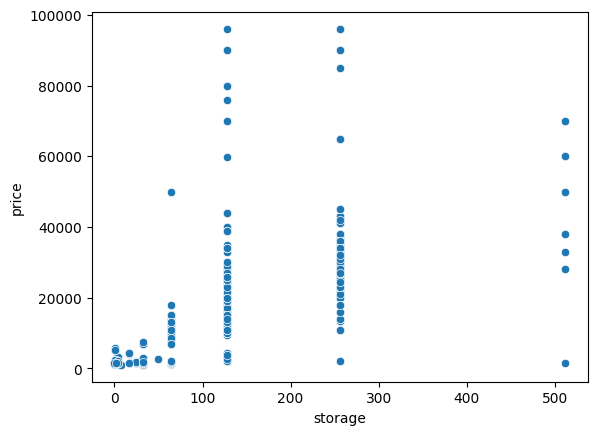

In [154]:
sns.scatterplot(data=df,x="storage",y="price")

<Axes: xlabel='storage', ylabel='Count'>

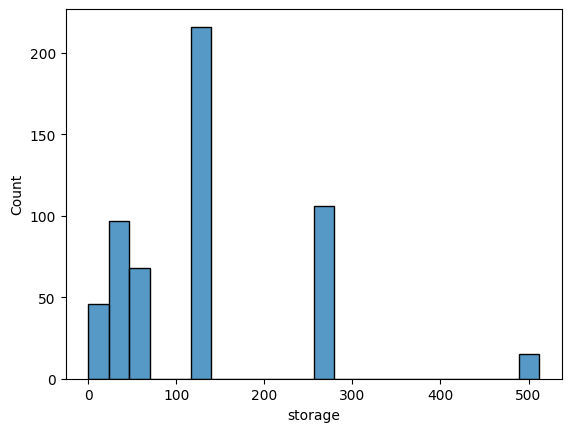

In [155]:
sns.histplot(data=df,x="storage")

<Axes: xlabel='storage', ylabel='price'>

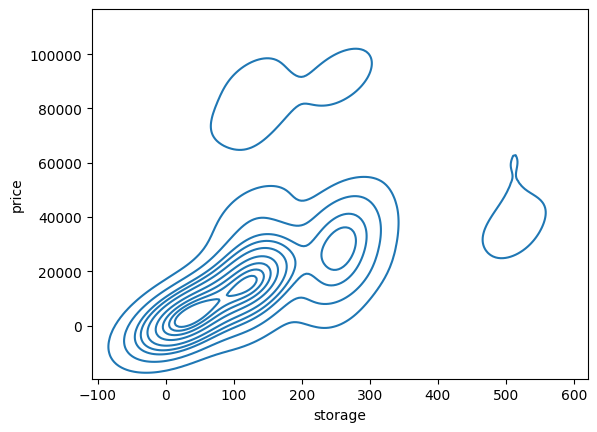

In [156]:
sns.kdeplot(data=df,x="storage",y="price")

##### expnadable

In [157]:
df.expandable

0      1000.0
1      1000.0
2         NaN
3      1000.0
4         NaN
        ...  
545       NaN
546       NaN
547       NaN
548      32.0
549       NaN
Name: expandable, Length: 548, dtype: float64

In [158]:
df.expandable.isnull().sum()

272

In [159]:
df.groupby("display").expandable.median()

display
0      32.0
1    1000.0
Name: expandable, dtype: float64

In [160]:
df.loc[df.display==0, "expandable"] = df.loc[df.display==0, "expandable"].fillna(32)
df.loc[df.display==1, "expandable"] = df.loc[df.display==1, "expandable"].fillna(1000)

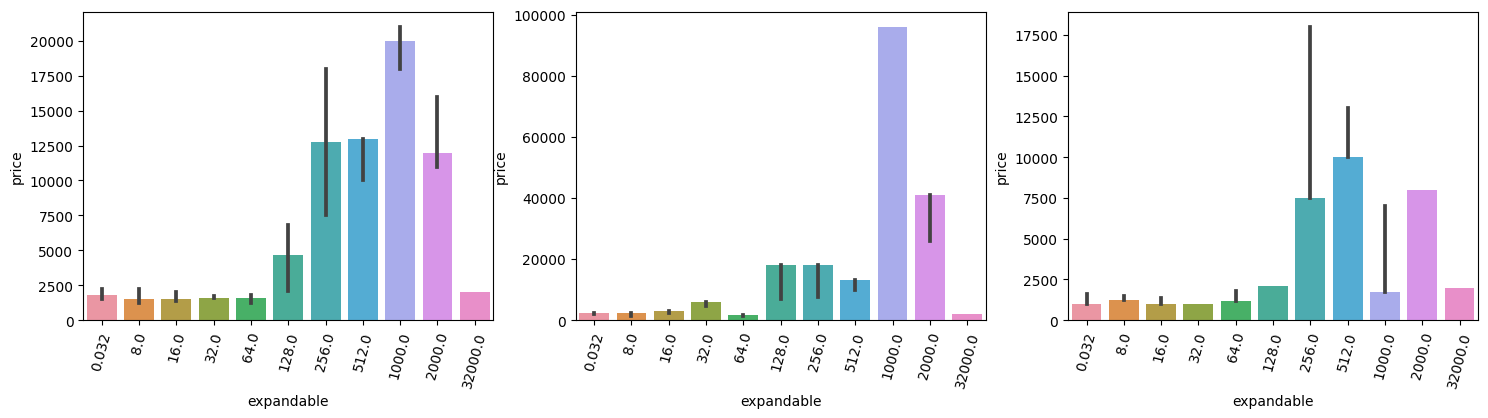

In [161]:
bars("expandable",75)

##### camera

In [162]:
df.camera

0      50.0
1      50.0
2      52.0
3      52.0
4      52.0
       ... 
545     NaN
546    63.0
547    50.0
548     3.0
549    50.0
Name: camera, Length: 548, dtype: float64

In [163]:
df.camera.isnull().sum()

38

<Axes: xlabel='camera', ylabel='price'>

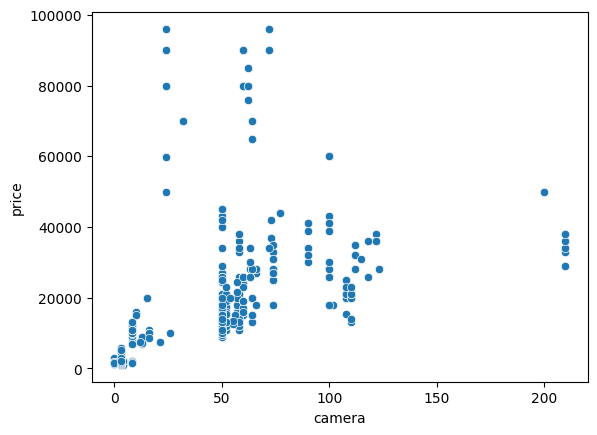

In [164]:
sns.scatterplot(data=df,x="camera",y="price")

##### secondary_camera

In [165]:
df.secondary_camera

0       5.0
1       5.0
2      16.0
3       8.0
4      16.0
       ... 
545     NaN
546    32.0
547     NaN
548     NaN
549     NaN
Name: secondary_camera, Length: 548, dtype: float64

In [166]:
df.secondary_camera.isnull().sum()

192

<Axes: xlabel='secondary_camera', ylabel='price'>

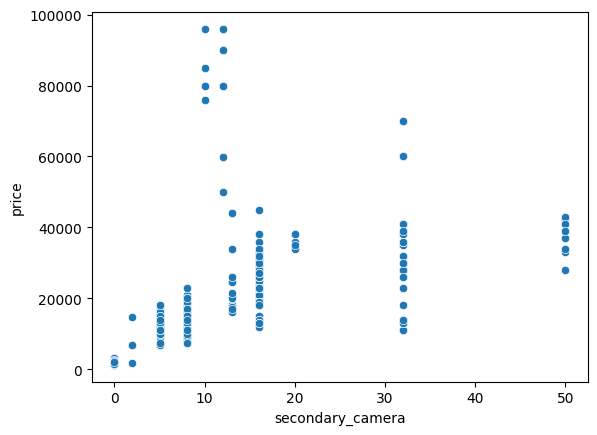

In [167]:
sns.scatterplot(data=df[df.secondary_camera < 200],x="secondary_camera",y="price")

##### video

In [168]:
df.video

0      FHD
1      FHD
2       SD
3      FHD
4       SD
      ... 
545    NaN
546     SD
547    NaN
548    NaN
549    NaN
Name: video, Length: 548, dtype: object

In [169]:
df.video.isnull().sum()

287

##### network

In [170]:
df.network

0      5G
1      5G
2      5G
3      5G
4      5G
       ..
545    2G
546    5G
547    5G
548    2G
549    5G
Name: network, Length: 548, dtype: object

In [171]:
df.network.isnull().sum()

6

In [172]:
df[df.network.isnull()]

,title,rating,image,price,touch,quick_charge,gpu,processor_brand,ram,hd,...,width,os,core,clock_speed,storage,expandable,camera,secondary_camera,video,network
156,SAMSUNG GT 1200 R/I/M (Black),3.3,https://rukminim2.flixcart.com/image/416/416/x...,1999,No,no,no,unknown,0.032,No,...,240.0,o,Single,NaN,32.00,32.0,NaN,NaN,NaN,NaN
224,SAMSUNG Metro 313 (Black),3.9,https://rukminim2.flixcart.com/image/416/416/k...,2999,No,no,no,unknown,0.512,No,...,480.0,o,Single,208.0,2.27,32.0,3.0,NaN,NaN,NaN
246,SAMSUNG Metro 313 (White),3.4,https://rukminim2.flixcart.com/image/416/416/x...,2699,No,no,no,unknown,0.032,No,...,480.0,o,Single,208.0,2.00,32.0,3.0,NaN,NaN,NaN
327,SAMSUNG Metro B313E Dual Sim - White (White),3.3,https://rukminim2.flixcart.com/image/416/416/x...,2499,No,no,no,unknown,0.010,No,...,240.0,o,Single,NaN,1.00,32.0,3.0,NaN,NaN,NaN
395,KARBONN K110i (Black),3.6,https://rukminim2.flixcart.com/image/416/416/x...,1240,No,no,no,unknown,0.032,No,...,160.0,o,Single,NaN,32.00,8.0,NaN,NaN,NaN,NaN
489,Kechaoda K-9 (WhiteIIBlackIIRed),4.0,https://rukminim2.flixcart.com/image/416/416/x...,1696,No,no,no,unknown,0.064,No,...,220.0,o,Single,1.2,64.00,32.0,3.0,NaN,NaN,NaN


In [173]:
df.network.fillna("2G",inplace=True)

In [174]:
df.network.value_counts()

network
5G    256
2G    152
4G    139
3G      1
Name: count, dtype: int64

In [175]:
# let's merge 3g with 4g
df.loc[df.network == '3G','network'] = '2G'

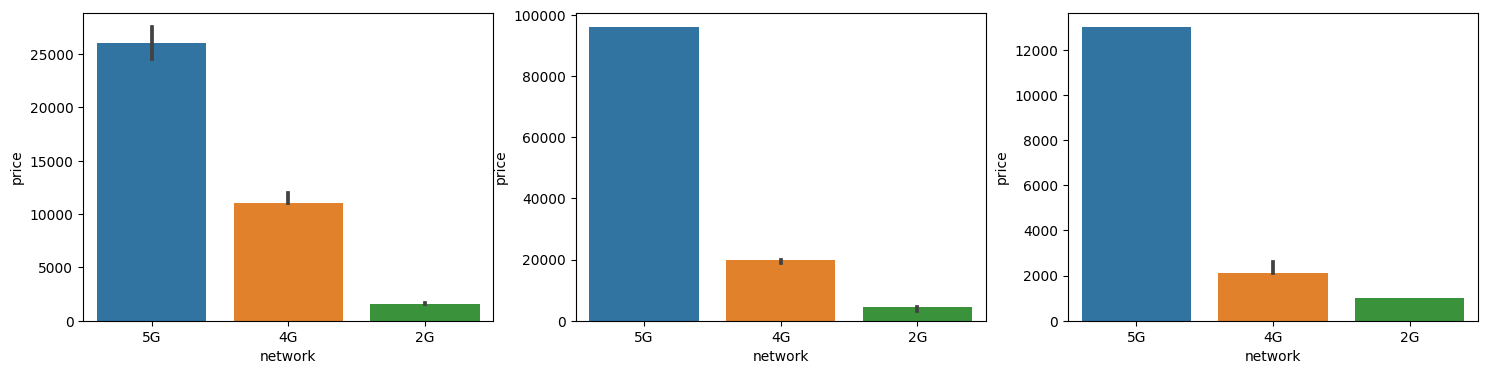

In [176]:
bars("network")

##### final preperation

In [177]:
df.columns

Index(['title', 'rating', 'image', 'price', 'touch', 'quick_charge', 'gpu',
       'processor_brand', 'ram', 'hd', 'battery', 'battery_type',
       'warranty_time', 'java', 'brand', 'headset', 'charger', 'warranty',
       'cable', 'pro', 'model', 'color1', 'color2', 'sim', 'display', 'height',
       'width', 'os', 'core', 'clock_speed', 'storage', 'expandable', 'camera',
       'secondary_camera', 'video', 'network'],
      dtype='object')

In [178]:
df.drop(columns=df.columns[[0,2,12,13,15,17,18,19,20,21,22,23,26,27,29,32,33,34]],inplace=True)

In [179]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 548 entries, 0 to 549
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   rating           548 non-null    float64
 1   price            548 non-null    int64  
 2   touch            548 non-null    object 
 3   quick_charge     548 non-null    object 
 4   gpu              548 non-null    object 
 5   processor_brand  548 non-null    object 
 6   ram              548 non-null    float64
 7   hd               548 non-null    object 
 8   battery          548 non-null    float64
 9   battery_type     548 non-null    object 
 10  brand            548 non-null    object 
 11  charger          548 non-null    bool   
 12  display          548 non-null    int64  
 13  height           548 non-null    float64
 14  core             548 non-null    object 
 15  storage          548 non-null    float64
 16  expandable       548 non-null    float64
 17  network          548 

In [180]:
df.to_csv("files/final_data.csv",index=False)

In [181]:
df = pd.read_csv("files/final_data.csv")

In [182]:
from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder,FunctionTransformer
from sklearn.compose import ColumnTransformer

In [183]:
ohe = OneHotEncoder(sparse_output=False,drop='first')
oe = OrdinalEncoder(categories=[["2G","4G","5G"],["No","Yes"],[False,True],["No","Yes"],["no","yes"],["no","yes"]])

In [184]:
ct = ColumnTransformer(transformers=[
    ("ohe",ohe,['processor_brand','hd','battery_type','brand','core']),
    ("le",oe,["network","hd","charger",'touch',"quick_charge","gpu"])
],remainder="passthrough")

In [185]:
ddf = pd.DataFrame(ct.fit_transform(df.drop(columns=["price"])))

In [186]:
ddf

,0,1,2,3,4,5,6,7,8,9,...,42,43,44,45,46,47,48,49,50,51
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,1.0,1.0,4.2,4.000,5000.0,1.0,1650.0,128.0,1000.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,1.0,1.0,4.3,6.000,5000.0,1.0,1650.0,128.0,1000.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,1.0,1.0,1.0,4.2,8.000,5000.0,1.0,1600.0,128.0,1000.0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,1.0,1.0,1.0,4.3,6.000,5000.0,1.0,2460.0,128.0,1000.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,1.0,1.0,1.0,4.2,8.000,5000.0,1.0,1600.0,128.0,1000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
543,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,3.4,0.032,800.0,0.0,128.0,2.0,32.0
544,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,1.0,1.0,1.0,4.5,8.000,5000.0,1.0,2400.0,128.0,1000.0
545,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,1.0,1.0,0.0,4.5,8.000,5160.0,1.0,1260.0,256.0,1000.0
546,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,3.8,0.032,2500.0,0.0,240.0,64.0,32.0


In [187]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [188]:
x = ddf
y = df["price"]

In [189]:
x.shape

(548, 52)

In [190]:
y

0      12999
1      13999
2      14999
3      16999
4      14999
       ...  
543     1499
544    25999
545    41999
546     1999
547    19999
Name: price, Length: 548, dtype: int64

In [191]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [192]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape 

((438, 52), (110, 52), (438,), (110,))

In [193]:
ss = StandardScaler()

x_train_scaled = ss.fit_transform(x_train)
x_test_scaled = ss.transform(x_test)

##### model Training

In [194]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score

In [195]:
def adjusted_r2(x,r2):
    n = x.shape[0]
    k = x.shape[1]
    return 1 - ( (1-r2) * (n-1) / (n-1-k) )


In [196]:
## Linear Regression

from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(x_train_scaled,y_train)

print(r2_score(lr.predict(x_train_scaled),y_train))
print(r2_score(lr.predict(x_test_scaled),y_test))

print(adjusted_r2(x_train_scaled,r2_score(lr.predict(x_train_scaled),y_train)))
print(adjusted_r2(x_test_scaled,r2_score(lr.predict(x_test_scaled),y_test)))

0.8562726071704231
0.7204943109499796
0.8368600761908439
0.46550666479908387


In [197]:
from sklearn.model_selection import GridSearchCV

In [198]:
## Decision tree

from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor(min_samples_leaf=3,max_depth=15,criterion='friedman_mse',)
dt.fit(x_train,y_train)

print(r2_score(dt.predict(x_train),y_train))
print(r2_score(dt.predict(x_test),y_test))

print(adjusted_r2(x_train,r2_score(dt.predict(x_train),y_train)))
print(adjusted_r2(x_test,r2_score(dt.predict(x_test),y_test)))

0.9583258884485062
0.9668941477318954
0.9526971772779148
0.9366923175925719


In [199]:
params = {
    'max_depth' : [15,18,20],
    'criterion' : ['squared_error','friedman_mse'],
    'max_features' : [40,45,50],
    'min_samples_leaf' : [2,3]
}

gd = GridSearchCV(estimator=dt,param_grid=params,cv=5,n_jobs=-1,verbose=1)

In [200]:
gd.fit(x,y)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


GridSearchCV(cv=5,
             estimator=DecisionTreeRegressor(criterion='friedman_mse',
                                             max_depth=15, min_samples_leaf=3),
             n_jobs=-1,
             param_grid={'criterion': ['squared_error', 'friedman_mse'],
                         'max_depth': [15, 18, 20],
                         'max_features': [40, 45, 50],
                         'min_samples_leaf': [2, 3]},
             verbose=1)

In [201]:
gd.best_estimator_

DecisionTreeRegressor(max_depth=18, max_features=50, min_samples_leaf=3)

In [202]:
gd.best_score_

0.9116188786007194

In [203]:
## Random Forest

from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()

In [204]:
params = {
    'max_depth' : [15,18,20],
    'criterion' : ['squared_error','friedman_mse'],
    'max_features' : [40,45,50],
    'min_samples_leaf' : [2,3],
    'n_estimators' : [200,250,300]
}

gd = GridSearchCV(estimator=rf,param_grid=params,cv=5,n_jobs=-1,verbose=1)

In [205]:
gd.fit(x,y)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'criterion': ['squared_error', 'friedman_mse'],
                         'max_depth': [15, 18, 20],
                         'max_features': [40, 45, 50],
                         'min_samples_leaf': [2, 3],
                         'n_estimators': [200, 250, 300]},
             verbose=1)

In [206]:
gd.best_score_

0.9106816405288287

In [207]:
gd.best_params_

{'criterion': 'squared_error',
 'max_depth': 15,
 'max_features': 40,
 'min_samples_leaf': 2,
 'n_estimators': 300}

In [208]:
rf.fit(x_train,y_train)

print(r2_score(rf.predict(x_train),y_train))
print(r2_score(rf.predict(x_test),y_test))

print(adjusted_r2(x_train,r2_score(rf.predict(x_train),y_train)))
print(adjusted_r2(x_test,r2_score(rf.predict(x_test),y_test)))

0.9922559408563266
0.9795585044145341
0.9912099900109473
0.960910122476916


In [209]:
import pickle as pkl

In [210]:
pkl.dump(rf,open('files/model.pkl','wb'))

In [211]:
from sklearn.pipeline import Pipeline

In [212]:
pipe = Pipeline([
    ('ct',ct),
    ('rf',rf)
])

In [213]:
pipe

Pipeline(steps=[('ct',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False),
                                                  ['processor_brand', 'hd',
                                                   'battery_type', 'brand',
                                                   'core']),
                                                 ('le',
                                                  OrdinalEncoder(categories=[['2G',
                                                                              '4G',
                                                                              '5G'],
                                                                             ['No',
                                                                              'Yes'],
                                                                             [False,
                                                                              True],
                                                                             ['No',
                                                                              'Yes'],
                                                                             ['no',
                                                                              'yes'],
                                                                             ['no',
                                                                              'yes']]),
                                                  ['network', 'hd', 'charger',
                                                   'touch', 'quick_charge',
                                                   'gpu'])])),
                ('rf', RandomForestRegressor())])

In [214]:
pkl.dump(pipe,open('files/pipe.pkl','wb'))